# Part 7 Solving Calculus Problems

In [4]:
'''
Derivative calculator
'''

from sympy import Symbol, Derivative, sympify, pprint
from sympy.core.sympify import SympifyError

def derivative(f, var):
    var = Symbol(var)
    d = Derivative(f, var).doit()
    pprint(d)

if __name__ == '__main__':
    
    f = input('Enter a function: ')
    var = input('Enter the variable to diffrentiatite with respect to: ')
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid input')
    else:
        derivative(f, var)
        

Enter a function: 2*x*y + x*y**2
Enter the variable to diffrentiatite with respect to: x
 2      
y  + 2⋅y


In [11]:
'''
Higher-Order Derivatives and Finding the Maxima
and Minima
Consider the function x5 − 30x**3 + 50x, defined on the domain [−5, 5].
'''
from sympy import Symbol, solve ,Derivative
x = Symbol('x')
f = x **5 - 30*x**3 + 50*x
d1 = Derivative(f, x).doit()
critical_points = solve(d1)
critical_points

[-sqrt(9 - sqrt(71)),
 sqrt(9 - sqrt(71)),
 -sqrt(sqrt(71) + 9),
 sqrt(sqrt(71) + 9)]

In [8]:
A = critical_points[2]
B = critical_points[0]
C = critical_points[1]
D = critical_points[3]
d2 = Derivative(f, x, 2).doit()
print(d2.subs({x:B}).evalf(), d2.subs({x:C}).evalf(), d2.subs({x:A}).evalf(), d2.subs({x:D}).evalf())


127.661060789073 -127.661060789073 -703.493179468151 703.493179468151


In [9]:
x_min = -5
x_max = 5

print(f.subs({x:A}).evalf(), f.subs({x:C}).evalf(), f.subs({x:x_min}).evalf(), f.subs({x:x_max}).evalf())

705.959460380365 25.0846626340294 375.000000000000 -375.000000000000


In [10]:
print(f.subs({x:B}).evalf(), f.subs({x:D}).evalf(), f.subs({x:x_min}).evalf(), f.subs({x:x_max}).evalf())

-25.0846626340294 -705.959460380365 375.000000000000 -375.000000000000


In [14]:
'''
Use gradientt ascent to find the angle at which the projectile
has maximum range a fixed velocity, 25 m/s
'''

import math
from sympy import Derivative, Symbol, sin

def grad_ascent(x0, f1x, x):
    epsilon = 1e-6#1
    step_size = 1e-4#2
    x_old = x0#3
    x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()#4
    while abs(x_old - x_new) > epsilon:#5
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    return x_new

def find_max_theta(R, theta):#6
    # Calculate the firs derivative
    R1theta = Derivative(R, theta).doit()
    theta0 = 1e-3
    theta_max = grad_ascent(theta0, R1theta, theta)
    return theta_max#7

if __name__ == '__main__':
    
    g = 9.8
    # Assume initial velocity
    u = 25
    # Expression fior range
    theta = Symbol('theta')
    R = u**2*sin(2*theta)/g #8
    
    theta_max = find_max_theta(R, theta)#9
    print(f'Theta: {math.degrees(theta_max)}')
    print(f'Maximum Range: {R.subs({theta:theta_max})}')

Theta: 44.997815081691805
Maximum Range: 63.7755100185965


In [20]:
'''
A Generic Program for Gradient Ascent
Use gradient ascent to find the maximum value of a
single-variable function
'''

from sympy import Derivative, Symbol, sympify

def grad_ascent(x0,f1x, x):
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old +step_size*f1x.subs({x:x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    return x_new

if __name__ == '__main__':
    
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)#1
        d = Derivative(f, var).doit()#2
        var_max = grad_ascent(var0, d, var)#3
        print(f'{var.name}: {var_max}')
        print(f'Maximum value: {f.subs({var:var_max})}')


Enter a function in one variable: x**5 - 30*x**3 + 50*x
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 0.5
x: 0.757452532565767
Maximum value: 25.0846622605419


In [22]:
'''
Use gradient ascent to find the maximum value of a single-variable function
This also checks for the existence of a solution for the equation f'(x)=0
'''

def grad_ascent(x0, f1x, x):
    # Check if f1x=0 has a solution
    if not solve(f1x):
        print(f'Cannot countinue, solution for {f1x}=0 does exist')
        return
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x0
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    return x_new

if __name__ == '__main__':
    
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function enterd')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_max = grad_ascent(var0, d, var)
        if var_max:
            print(f'{var.name}: {var_max}')
            print(f'Maximum value: {f.subs({var:var_max})}')

Enter a function in one variable: log(x)
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 0.1
Cannot countinue, solution for 1/x=0 does exist


## Probability Density Functions
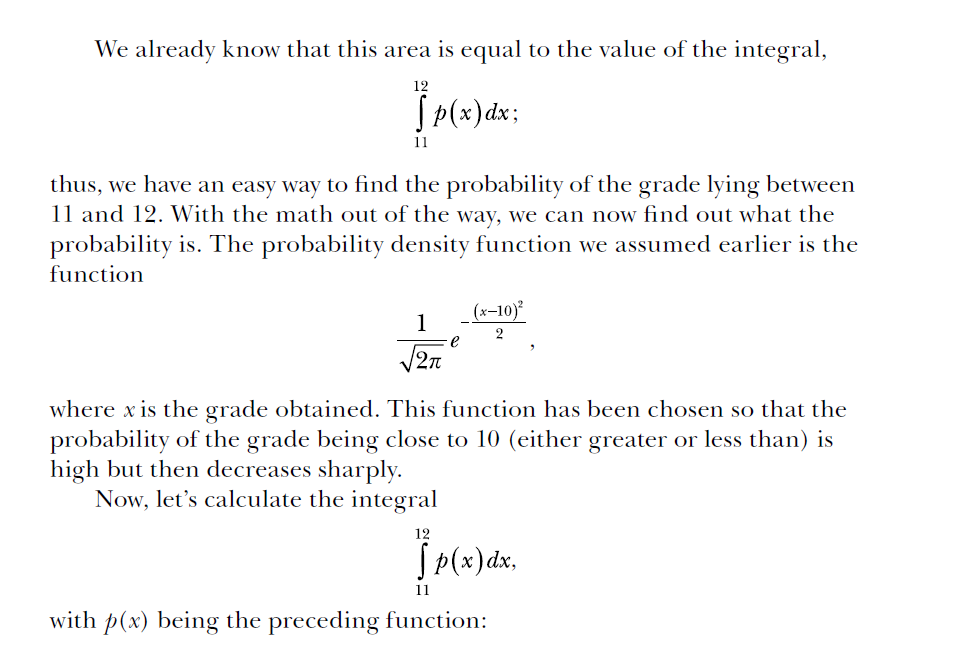


In [28]:
from sympy import Symbol, exp, sqrt, pi, Integral
x = Symbol('x')
p = exp(-(x-10)**2/2)/sqrt(2*pi)
Integral(p,(x, 11, 12)).doit().evalf()

0.135905121983278

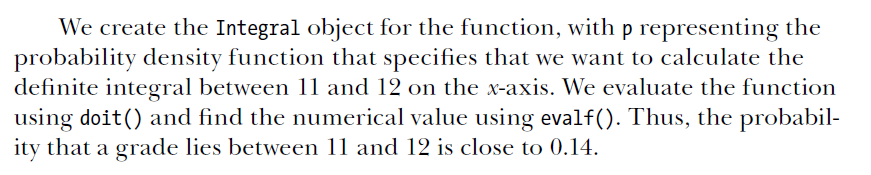
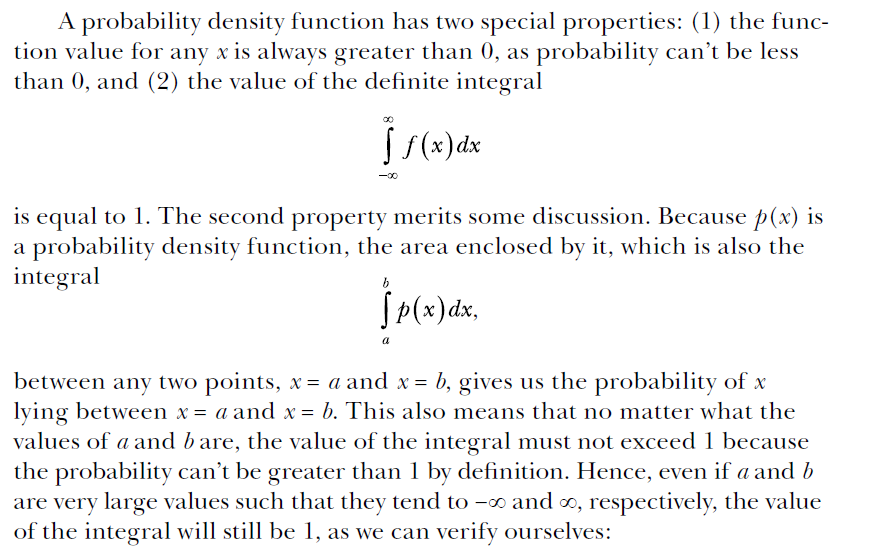

In [1]:
from sympy import Symbol, exp, sqrt, pi, Integral, S
x = Symbol('x')
p = exp(-(x-10)**2/2)/sqrt(2*pi)
Integral(p,(x, S.NegativeInfinity, S.Infinity)).doit().evalf()

1.00000000000000

## Programming Challenges
### 1: Verify continuity of a Function att a Point
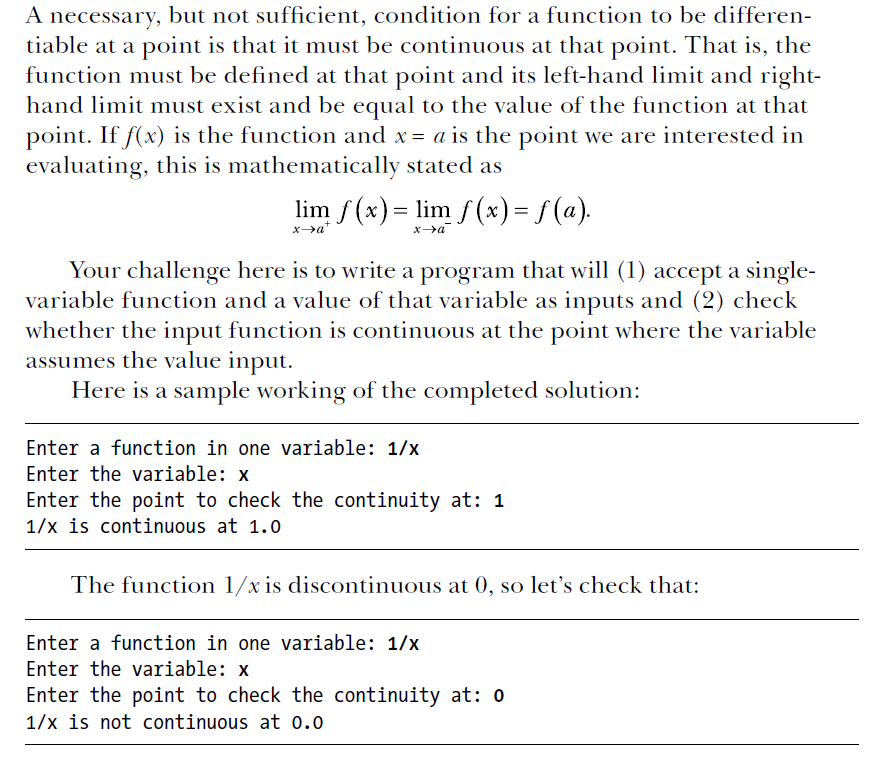

In [3]:
'''
Verify the continuity of a function
'''

from sympy import Limit, Symbol, sympify, SympifyError

def check_continuity(f, var, a):
    l1 = Limit(f, var, a, dir='+').doit()
    l2 = Limit(f, var, a, dir='-').doit()
    f_val = f.subs({var:a})
    
    if l1 == l2 and f_val == l1:
        print(f'{f} is continuous at {a}')
    else:
        print(f'{f} is not continuous at {a}')

if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable: ')
    a = float(input('Enter the point tto check the continuity at: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = check_continuity(f, var, a)
        

Enter a function in one variable: 1/x
Enter the variable: x
Enter the point tto check the continuity at: 1
1/x is continuous at 1.0


### 2: Implement the Gradient Descent
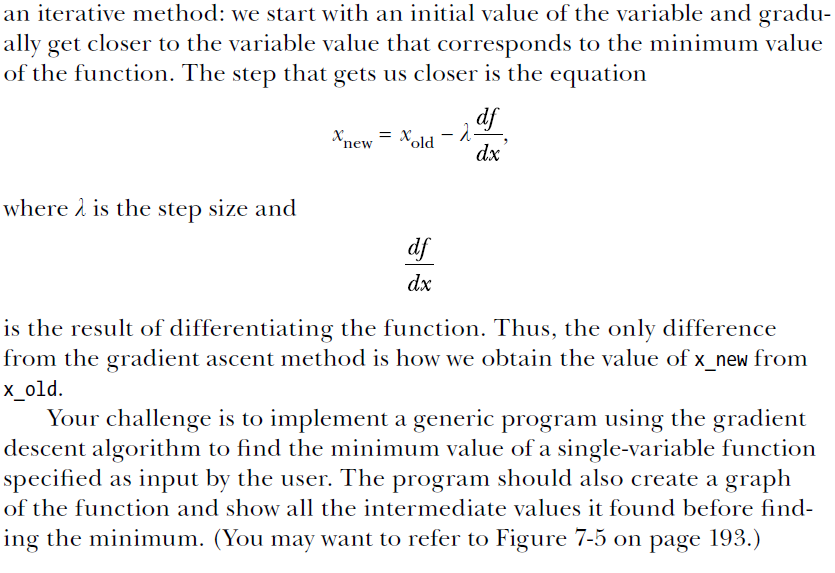

Enter a function in one variable: 3*x**2 + 2*x
Enter the variable to diffrentiate with respect to: x
Enter the initial value of the variable: 0.1
x: -0.331668643986980
Minimum value: -0.333325019761474


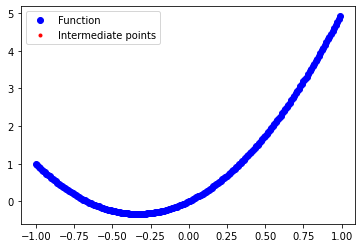

In [12]:
'''
Use gradient descent to find the minimum value of a
single variable function. This also checks for the existence
of a solution for the equation f'(x)=0 and plots the intermediate
points traversed.
'''

from sympy import Derivative, Symbol, sympify, solve
import matplotlib.pyplot as plt

def grad_descent(x0, f1x, x):
    # Check if f1x=0 has a solution
    if not solve(f1x):
        print(f'Cannot countinue, solution for {f1x}=0 does not exist')
        return None
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old-step_size*f1x.subs({x: x_old}).evalf()
    
    # List to store the X values traversed
    X_traversed = []
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old - step_size*f1x.subs({x:x_old}).evalf()
        
    return x_new, X_traversed

def frange(start, final, interval):
    
    numbers = []
    while start < final:
        numbers.append(start)
        start = start + interval
    return numbers

def create_plot(X_traversed, f, var):
    # First create the graph of the function itself
    x_val = frange(-1, 1, 0.01)
    f_val = [f.subs({var:x}) for x in x_val]
    plt.plot(x_val, f_val, 'bo')
    # Calculate the function value at each of the intermediate points travesed
    f_travesed = [f.sub({var:x}) for x in X_traversed]
    plt.plot(X_traversed, f_travesed, 'r.')
    plt.legend(['Function', 'Intermediate Points'], loc='best')
    plt.show()

    
if __name__ == '__main__':
    
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to diffrentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function enterd')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_min, X_traversed = grad_descent(var0, d, var)
        if var_min:
            print(f'{var.name}: {var_min}')
            print(f'Minimum value: {f.subs({var:var_min})}')
        create_plot(X_traversed, f, var)

### 3: Area Between Two Curves
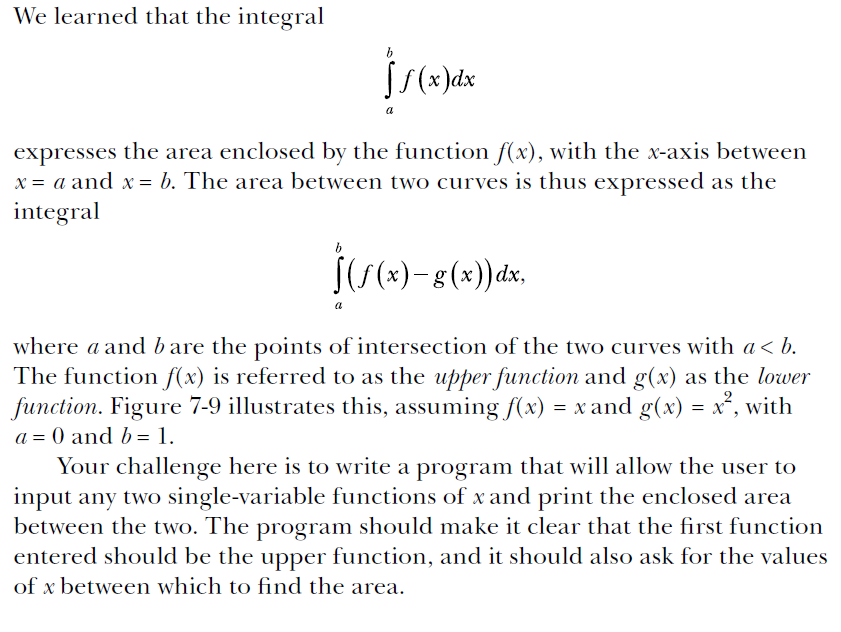

In [19]:
'''
Find the area enclosed by two curves between two points
'''
from sympy import Integral, Symbol, SympifyError, sympify

def find_area(f, g, var, a, b):
    a = Integral(f-g, (var, a, b)).doit()
    return a

if __name__ == '__main__':
    f = input('Enter the upper function in one variable: ')
    g = input('Enter the lower function in one variable: ')
    var = input('Enter the variable: ')
    l = float(input('Enter the lower bound of the enclosed region: '))
    u = float(input('Enter the upper bound of the enclosed region: '))
    
    try:
        f = sympify(f)
        g = sympify(g)
    except SympifyError:
        print('One of the function entered is invalid')
    else:
        var = Symbol(var)
        print(f'Area enclosed by {f} and {g} is: {find_area(f, g, var, l, u)}')


Enter the upper function in one variable: 1/2(x)
Enter the lower function in one variable: x**2
Enter the variable: x
Enter the lower bound of the enclosed region: 0
Enter the upper bound of the enclosed region: 1


TypeError: 'Integer' object is not callable

### 4: Finding the length of a Curve
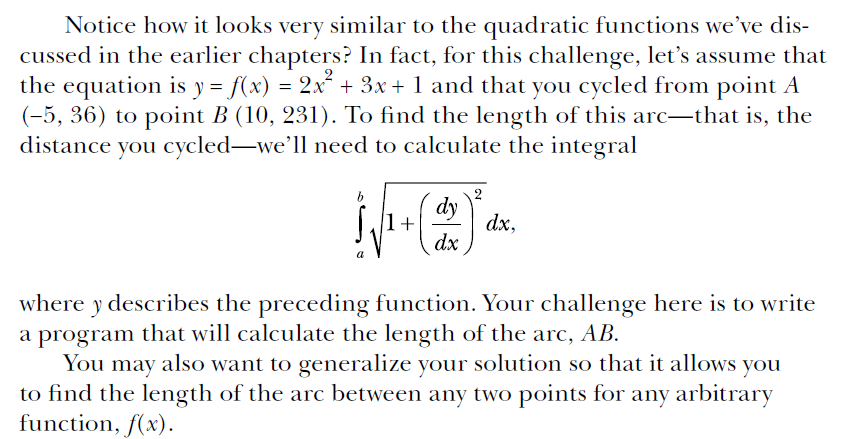

In [17]:
'''
Find the length of a cruve beteen two points
'''

from sympy import Derivative, Integral, Symbol, sqrt, SympifyError, sympify

def find_length(fx, var, a, b):
    deriv =  Derivative(fx, var).doit()
    length = Integral(sqrt(1+deriv**2), (var, a, b)).doit().evalf()
    return length

if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the lower limit of the variable: ')
    l = float(input('Enter the lower limit of the variable: '))
    u = float(input('Enter the upper limit of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function enterd')
    else:
        var = Symbol(var)
        print(f'Length of {f} between {l} and {u} is: {find_length(f, var, l , u)}')

Enter a function in one variable: 2*x**2 + 3*x + 1
Enter the lower limit of the variable: x
Enter the lower limit of the variable: -5
Enter the upper limit of the variable: 10
Length of 2*x**2 + 3*x + 1 between -5.0 and 10.0 is: 268.372650946022
